In [317]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [318]:
# bureau_data.csv,customers.csv,loans.csv

In [319]:
# Load the data from the 'data' folder
bureau_data = pd.read_csv('data/bureau_data.csv')
customers = pd.read_csv('data/customers.csv')
loans = pd.read_csv('data/loans.csv')
bureau_data.shape, customers.shape, loans.shape
# Check the first few rows of each dataframe

((50000, 8), (50000, 12), (50000, 15))

In [ ]:
print("Bureau Data:")
print(bureau_data.head())

print("\nCustomers Data:")
print(customers.head())

print("\nLoans Data:")
print(loans.head())

In [320]:
bureau_data.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [321]:
customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [322]:
loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [323]:
merged_data = pd.merge(bureau_data, customers, on='cust_id')
merged_data = pd.merge(merged_data, loans, on='cust_id')
merged_data.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [324]:
non_integer_columns = merged_data.select_dtypes(exclude='int64').columns
print(f"Number of non-integer columns: {len(non_integer_columns)}")
print("Non-integer columns:", non_integer_columns.tolist())

Number of non-integer columns: 14
Non-integer columns: ['cust_id', 'gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'loan_id', 'loan_purpose', 'loan_type', 'processing_fee', 'disbursal_date', 'installment_start_dt', 'default']


In [325]:
# lets make a copy of data frame

In [326]:
merged_data2 = merged_data.copy()
merged_data2.shape,merged_data.shape

((50000, 33), (50000, 33))

#### Analysis starts here

In [327]:
merged_data2.default.value_counts()

default
False    45703
True      4297
Name: count, dtype: int64

In [328]:
merged_data2['default'] = merged_data2['default'].astype(int)

In [329]:
merged_data2.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [330]:
#### Handling data leakage 
# data leakage is a common problem in machine learning, where the model inadvertently learns from data that it should not have access to during training.
#  This can lead to overly optimistic performance metrics and poor generalization to unseen data. 
# In this case, we need to ensure that the target variable (default) is not leaked into the features used for training the model.
# To handle data leakage, we can drop the 'default' column from the features used for training the model.

In [331]:
X = merged_data2.drop(columns=['default'])
y = merged_data2['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
merged_data2.train =pd.concat([X_train, y_train], axis=1)
print("Training set shape:", X_train.shape)

merged_data2.test = pd.concat([X_test, y_test], axis=1)
print("Testing set shape:", X_test.shape)

# print("Training set shape:", merged_data2.train.shape)
# print("Testing set shape:", merged_data2.test.shape)
# Check the shapes of the training and testing sets

Training set shape: (37500, 32)
Testing set shape: (12500, 32)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25592\2949462902.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  merged_data2.train =pd.concat([X_train, y_train], axis=1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25592\2949462902.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  merged_data2.test = pd.concat([X_test, y_test], axis=1)


In [332]:
print("Confirming percentage: Test Percentage:",X_test.shape[0]/merged_data2.shape[0]," and Test Percentage:",X_train.shape[0]/merged_data2.shape[0])

Confirming percentage: Test Percentage: 0.25  and Test Percentage: 0.75


In [333]:
X_train.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt
27434,C27435,4,2,90,6,33,8,59,45,F,...,3458000,3276000,65520.0,589680,2620800,24,905176,566117,2022-04-21,2022-05-21
13400,C13401,3,1,119,4,17,4,92,29,M,...,3103000,2540000,50800.0,457200,2032000,33,1008916,951329,2020-11-24,2020-12-11
883,C00884,2,1,83,14,78,4,83,50,F,...,2288000,1920000,38400.0,345600,1536000,19,1382399,771873,2019-08-25,2019-09-19
7303,C07304,1,1,37,0,0,5,34,43,F,...,307000,298000,5960.0,53640,238400,21,170015,117343,2020-04-16,2020-05-05
45124,C45125,2,0,62,6,28,5,19,31,F,...,283000,260000,5200.0,46800,208000,45,72025,67719,2024-01-26,2024-02-17


In [334]:
##merged_data2.test.head()

#### We start EDA wit the Train dataset  and we work with X_train

In [335]:
null_columns = X_train.isna().sum()
null_columns[null_columns > 0]

residence_type    48
dtype: int64

In [336]:
X_train.residence_type.value_counts(dropna=False)

residence_type
Owned       21114
Mortgage     8901
Rented       7437
NaN            48
Name: count, dtype: int64

In [337]:
# Find the mode of the 'residence_type' column
residence_type_mode = X_train['residence_type'].mode()[0]

# Calculate the percentage of the mode
mode_percentage = (X_train['residence_type'].value_counts(normalize=True)[residence_type_mode]) * 100

print(f"Mode of 'residence_type': {residence_type_mode}")
print(f"Percentage of mode: {mode_percentage:.2f}%")

Mode of 'residence_type': Owned
Percentage of mode: 56.38%


In [338]:
X_train['residence_type'].fillna(residence_type_mode, inplace=True)
X_train.residence_type.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25592\1055005771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['residence_type'].fillna(residence_type_mode, inplace=True)


np.int64(0)

In [339]:
continuous_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

continuous_data = X_train[continuous_columns]
categorical_data = X_train[categorical_columns]

print("Continuous Data Columns:", continuous_columns.tolist())
print("Categorical Data Columns:", categorical_columns.tolist())

Continuous Data Columns: ['number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'age', 'income', 'number_of_dependants', 'years_at_current_address', 'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application']
Categorical Data Columns: ['cust_id', 'gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'loan_id', 'loan_purpose', 'loan_type', 'disbursal_date', 'installment_start_dt']


In [340]:
# plot histograms for each continuous_columns showing the outliars, Plot 4 histograms per row

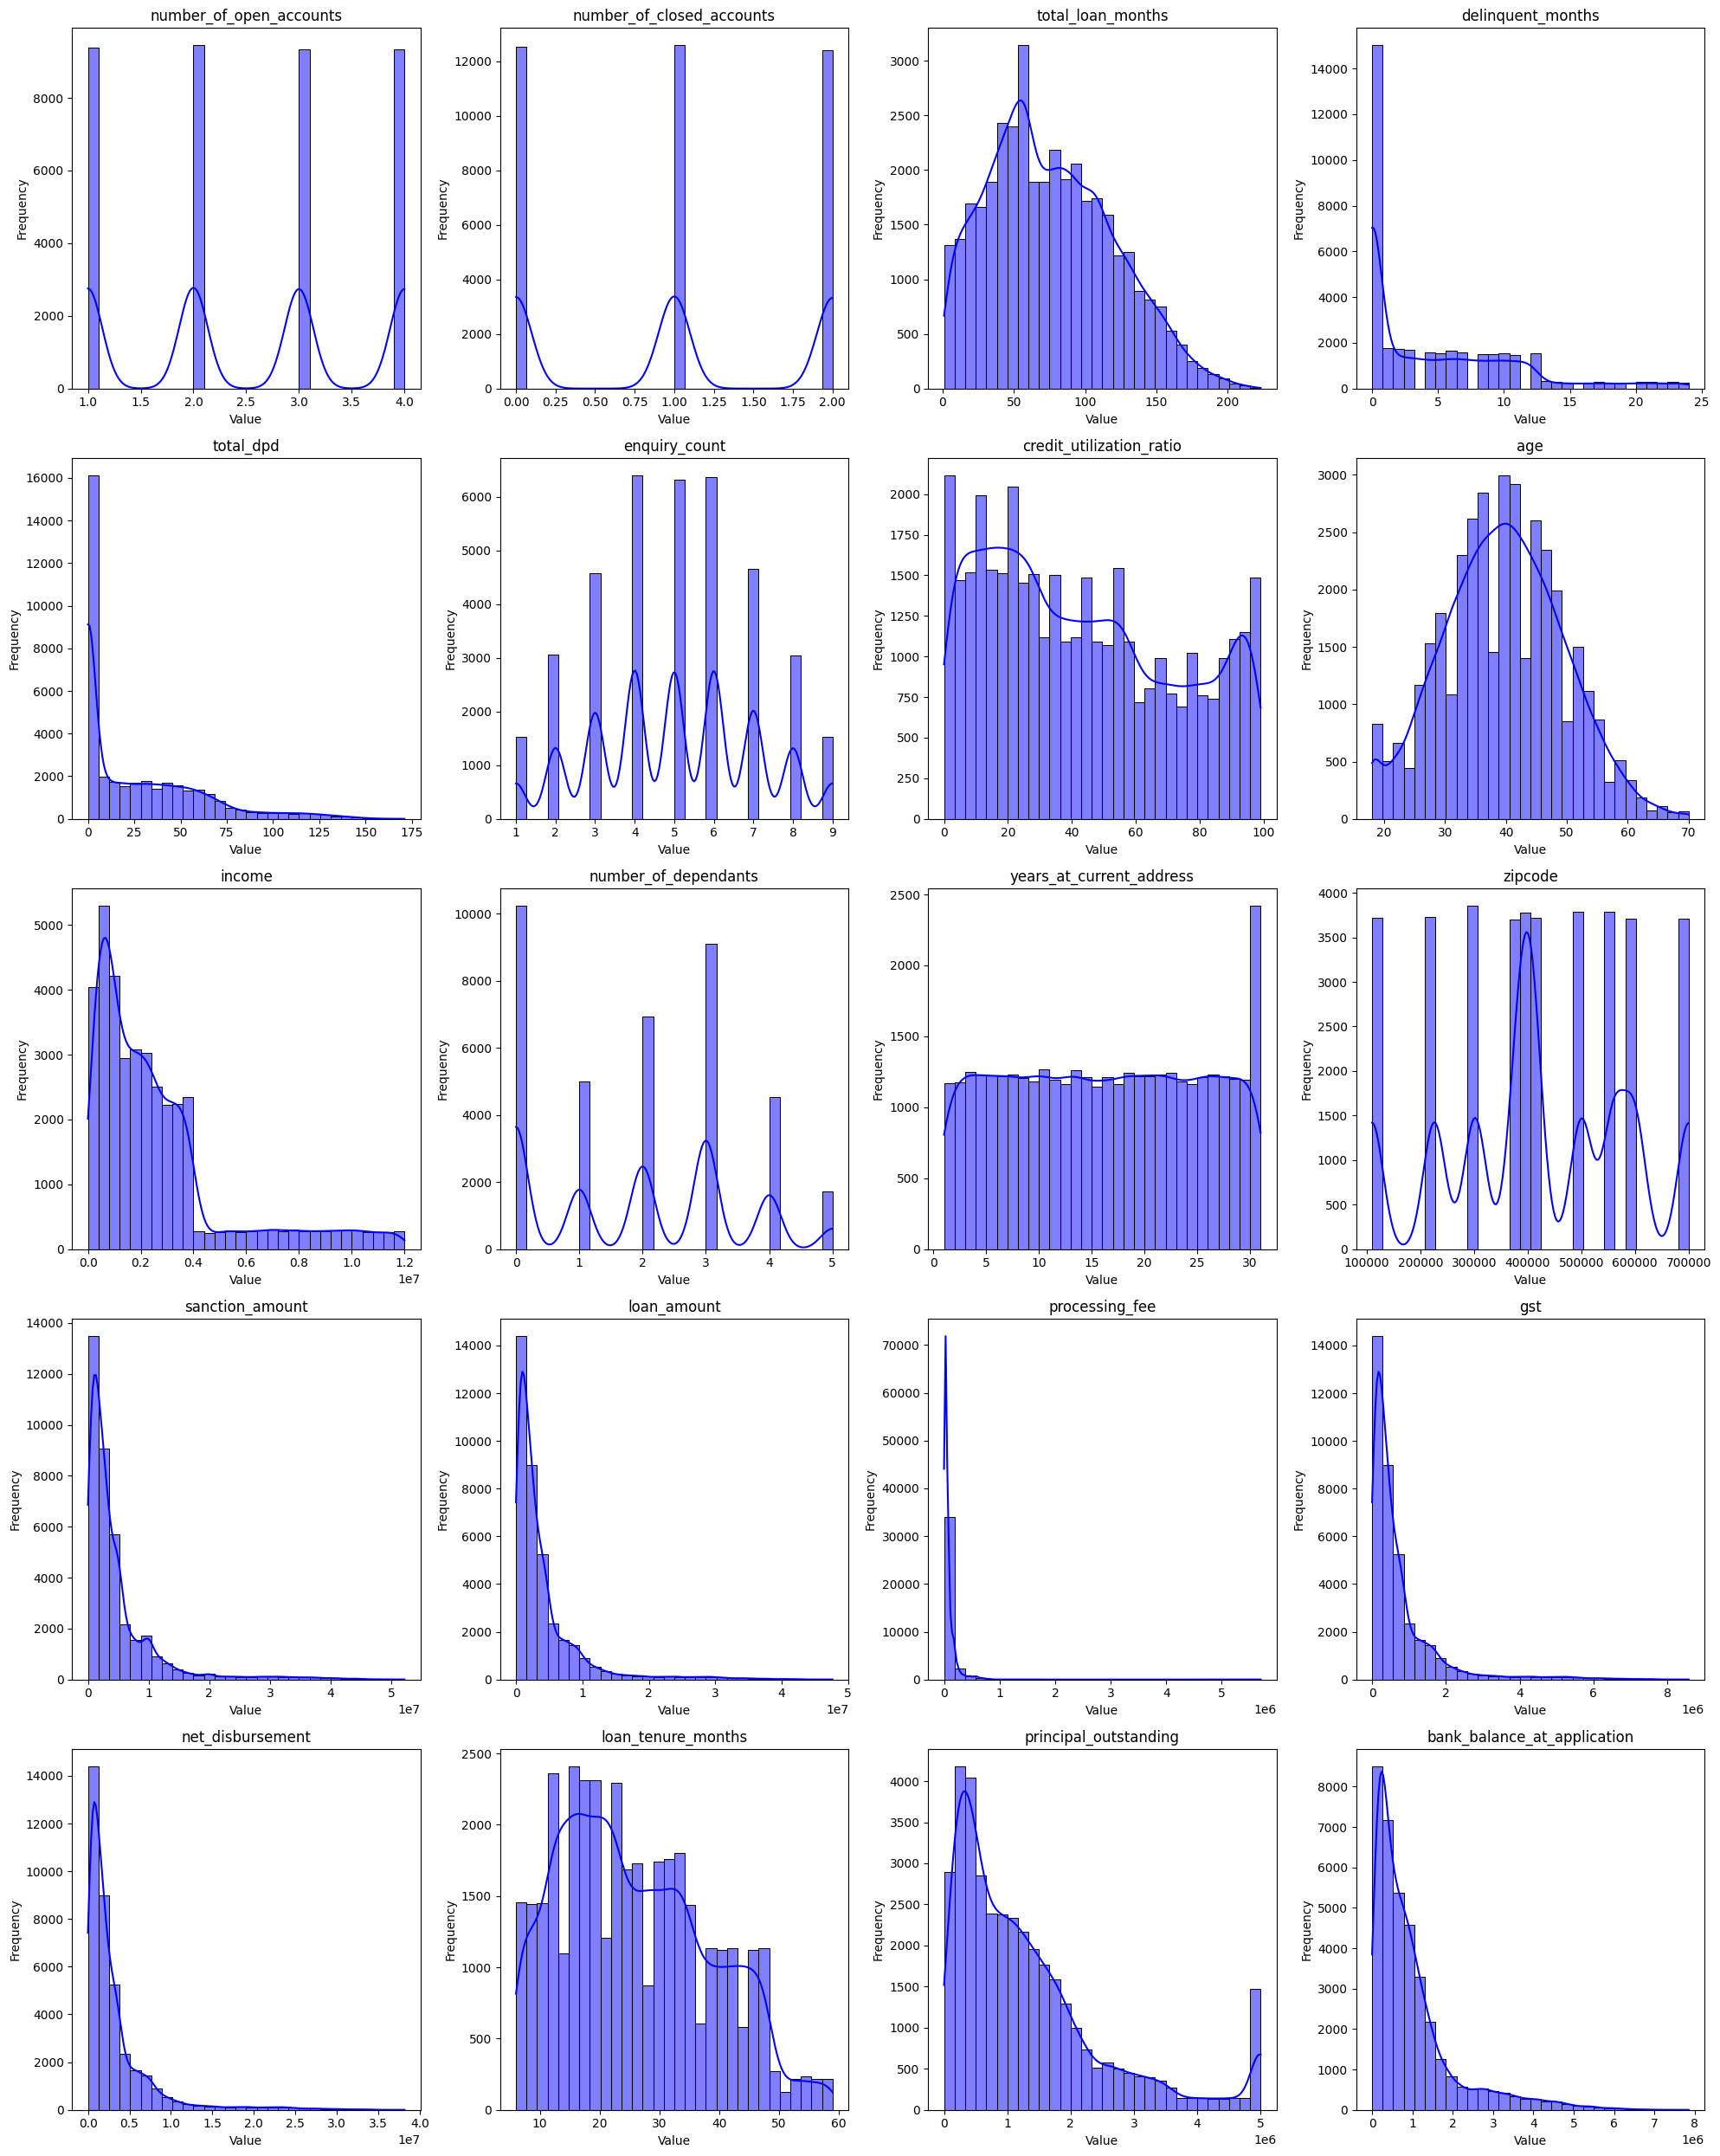

In [341]:
import seaborn as sns

# Set up the figure and axes for 4 histograms per row
num_columns = len(continuous_columns)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDE for each continuous column
for i, column in enumerate(continuous_columns):
    ax = axes[i]
    sns.histplot(X_train[column], kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [342]:
# Identify columns with potential outliers based on skewness
potential_outliers = continuous_data.skew().sort_values(ascending=False)
outlier_columns = potential_outliers[abs(potential_outliers) > 1].index.tolist()

print("Columns with potential outliers:", outlier_columns)

Columns with potential outliers: ['processing_fee', 'loan_amount', 'gst', 'net_disbursement', 'sanction_amount', 'bank_balance_at_application', 'income', 'principal_outstanding', 'total_dpd', 'delinquent_months']


##### Based on Business Knowledge

In [343]:
# Filter rows where processing_fee is greater than loan_amount
processing_fee_greater_than_loan_amount = X_train[X_train['processing_fee'] > X_train['loan_amount']]

# Display the resulting dataframe
processing_fee_greater_than_loan_amount

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt
23981,C23982,4,2,154,9,31,6,26,33,F,...,2649000,2234000,2.669791e+06,402120,1787200,32,920114,511339,2021-12-15,2022-01-14
9898,C09899,2,1,51,1,5,3,92,56,M,...,5000000,3626000,5.293544e+06,652680,2900800,6,2610719,2849384,2020-07-19,2020-08-11
47089,C47090,3,0,112,5,33,3,32,37,M,...,1815000,1738000,1.858965e+06,312840,1390400,18,1032442,626462,2024-04-07,2024-04-15
33705,C33706,3,1,140,0,0,5,47,54,M,...,5000000,3812000,5.678021e+06,686160,3049600,9,2744639,4612551,2022-12-05,2022-12-30
12294,C12295,1,2,58,0,0,3,86,49,M,...,5312000,4639000,5.698030e+06,835020,3711200,25,1890831,1282049,2020-10-15,2020-10-23
28174,C28175,3,0,111,8,41,3,62,36,F,...,1025000,966000,1.214493e+06,173880,772800,18,695519,390870,2022-05-18,2022-06-05
29305,C29306,2,2,42,11,65,3,2,52,M,...,2872000,2616000,3.036378e+06,470880,2092800,21,1883519,999324,2022-06-28,2022-07-21


In [344]:
processing_fee_greater_than_loan_amount[['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
9898,3626000,5.293544e+06
47089,1738000,1.858965e+06
33705,3812000,5.678021e+06
12294,4639000,5.698030e+06
28174,966000,1.214493e+06
29305,2616000,3.036378e+06


In [345]:
# outlier_dataframes = {}

# for column in outlier_columns:
#     # Calculate the 1st and 99th percentiles
#     lower_bound = continuous_data[column].quantile(0.01)
#     upper_bound = continuous_data[column].quantile(0.99)
    
#     # Filter rows with outliers
#     outliers = continuous_data[(continuous_data[column] < lower_bound) | (continuous_data[column] > upper_bound)]
    
#     # Store the outliers in a dictionary
#     outlier_dataframes[column] = outliers

# # Display the outliers for each column
# for column, outliers in outlier_dataframes.items():
#     print(f"Outliers in column '{column}':")
#     print(outliers)
#     print("\n")

In [346]:
# # Display the outliers for the 'processing_fee' column
# print("Outliers in 'processing_fee':")
# print(outlier_dataframes['processing_fee'])